In [1]:
import pandas as pd

Import the data from the Novel Coronavirus COVID-19 Data Repository from Johns Hopkins University’s Center for Systems Science and Engineering (CSSE)

In [2]:
def get_raw_date():
    confirmed_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    recovered_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
    death_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    return confirmed_df, recovered_df, death_df

Get each country's confirmed, recovered, death.
The original data is not really a time series data, we have to do some special handling.
Some countries report data at the city level, we have to take a sum for those to get the country level data.

In [3]:
def get_country_data(data, columnName, countryName):
    country_data = data.loc[data['Country/Region'] == countryName]
    country_time_series_only = country_data.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
    transposed = country_time_series_only.transpose()
    transposed = pd.DataFrame({
        columnName: transposed.sum(axis=1)
    })
    return transposed

Put the country's confirmed, recovered, death data together

In [4]:
def get_country_confirmed_recovered_death_data(confirmed_df, recovered_df, death_df, countryName):
    country_confirmed = get_country_data(confirmed_df, "Confirmed", countryName)
    country_recovered = get_country_data(recovered_df, "Recovered", countryName)
    country_death = get_country_data(death_df, "Death", countryName)
    country_all = country_confirmed
    country_all["Recovered"] = country_recovered.Recovered
    country_all["Death"] = country_death.Death
    return country_all

get the raw data

In [5]:
confirmed_df, recovered_df, death_df = get_raw_date()

In [25]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,14,16,16,16,23,174,174,187,208,208
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6,7,10,10,12,22,25,25,34,34
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,1,1,3,3,3,3,8,8,8,11


In [20]:
last_reported_data = confirmed_df.columns[-1]
last_reported_data

'5/9/20'

List of countries with cases above 10k

In [32]:
confirmed_df[confirmed_df[last_reported_data] >= 10000].loc[:, ['Country/Region',last_reported_data]]

,Country/Region,5/9/20
16,Austria,15833
20,Bangladesh,13770
22,Belarus,22052
23,Belgium,52596
28,Brazil,156061
42,Canada,21148
44,Canada,36997
48,Chile,27219
62,China,68129
82,Colombia,10495


Get the data for the following countries:
 - US
 - Italy
 - China
 - France
 - Spain

In [33]:
countries = list()
countries.append("US")
countries.append("Italy")
countries.append("China")
countries.append("France")
countries.append("Spain")
countries

['US', 'Italy', 'China', 'France', 'Spain']

In [34]:
combined_data = pd.DataFrame()
for country in countries:
    country_data = get_country_confirmed_recovered_death_data(confirmed_df, recovered_df, death_df, country)
    combined_data[country + " Confirmed"] = country_data.Confirmed
    combined_data[country + " Recovered"] = country_data.Recovered
    combined_data[country + " Death"] = country_data.Death
    combined_data[country + " Active"] = country_data.Confirmed - (country_data.Recovered + country_data.Death)
# last 10 days
combined_data.iloc[-10:]

,US Confirmed,US Recovered,US Death,US Active,Italy Confirmed,Italy Recovered,Italy Death,Italy Active,China Confirmed,China Recovered,China Death,China Active,France Confirmed,France Recovered,France Death,France Active,Spain Confirmed,Spain Recovered,Spain Death,Spain Active
4/30/20,1069424,153947,62996,852481,205463,75945,27967,101551,83956,78523,4637,796,167299,49476,24379,93444,213435,112050,24543,76842
5/1/20,1103461,164015,64943,874503,207428,78249,28236,100943,83959,78573,4637,749,167305,50212,24597,92496,213435,112050,24543,76842
5/2/20,1132539,175382,66369,890788,209328,79914,28710,100704,83959,78586,4637,736,168518,50663,24763,93092,216582,117248,25100,74234
5/3/20,1158040,180152,67682,910206,210717,81654,28884,100179,83964,78684,4637,643,168925,50885,24900,93140,217466,118902,25264,73300
5/4/20,1180375,187180,68922,924273,211938,82879,29079,99980,83966,78792,4637,537,169583,51476,25204,92903,218011,121343,25428,71240
5/5/20,1204351,189791,71064,943496,213013,85231,29315,98467,83968,78870,4637,461,170687,52842,25537,92308,219329,123486,25613,70230
5/6/20,1229331,189910,73455,965966,214457,93245,29684,91528,83970,78929,4637,404,174224,54079,25812,94333,220325,126002,25857,68466
5/7/20,1257023,195036,75662,986325,215858,96276,29958,89624,83975,78977,4637,361,174918,55191,25990,93737,221447,128511,26070,66866
5/8/20,1283929,198993,77180,1007756,217185,99023,30201,87961,83976,78993,4637,346,176202,55892,26233,94077,222857,131148,26299,65410
5/9/20,1309550,212534,78795,1018221,218268,103031,30395,84842,83990,79127,4637,226,176782,56148,26313,94321,223578,133952,26478,63148


Plot all of the data, this is kind of messy.

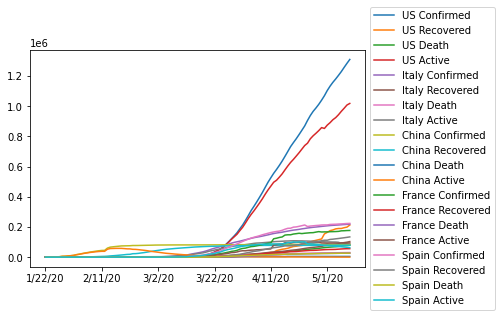

In [35]:
combined_data.plot().legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Show the confirmed cases in these countries.

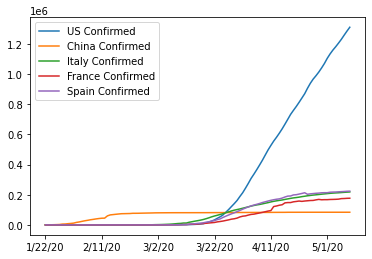

In [36]:
pd.DataFrame({   
    'US Confirmed': combined_data["US Confirmed"],
    'China Confirmed': combined_data["China Confirmed"],
    'Italy Confirmed': combined_data["Italy Confirmed"],
    'France Confirmed': combined_data["France Confirmed"],
    'Spain Confirmed': combined_data["Spain Confirmed"]
}).plot()

Show the deaths in these countries.

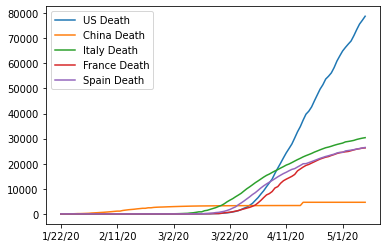

In [37]:
pd.DataFrame({   
    'US Death': combined_data["US Death"],
    'China Death': combined_data["China Death"],
    'Italy Death': combined_data["Italy Death"],
    'France Death': combined_data["France Death"],
    'Spain Death': combined_data["Spain Death"]
}).plot()

Show the recovered cases in these countries.

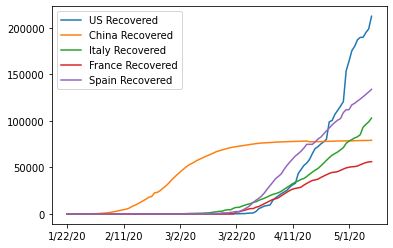

In [38]:
pd.DataFrame({   
    'US Recovered': combined_data["US Recovered"],
    'China Recovered': combined_data["China Recovered"],
    'Italy Recovered': combined_data["Italy Recovered"],
    'France Recovered': combined_data["France Recovered"],
    'Spain Recovered': combined_data["Spain Recovered"]
}).plot()

Looking at the active cases:
    - active cases = confirmed - (recovered + death)

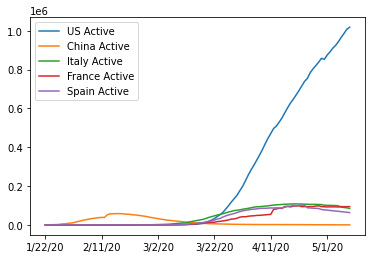

In [39]:
pd.DataFrame({   
    'US Active': combined_data["US Active"],
    'China Active': combined_data["China Active"],
    'Italy Active': combined_data["Italy Active"],
    'France Active': combined_data["France Active"],
    'Spain Active': combined_data["Spain Active"]
}).plot()

US recovered looks interesting, specially since March 22.
Anti-malarial drugs hydroxychloroquine and chloroquine coming into play here?

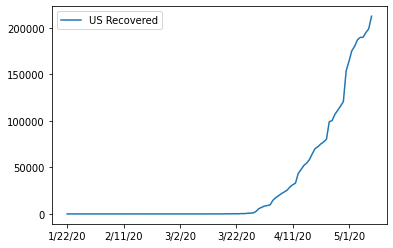

In [40]:
pd.DataFrame({   
    'US Recovered': combined_data["US Recovered"]
}).plot()

In [41]:
# look for the doubling rate? - number of days to double the cases

# predict the R-naught

In [42]:
combined_data.columns

Index(['US Confirmed', 'US Recovered', 'US Death', 'US Active',
       'Italy Confirmed', 'Italy Recovered', 'Italy Death', 'Italy Active',
       'China Confirmed', 'China Recovered', 'China Death', 'China Active',
       'France Confirmed', 'France Recovered', 'France Death', 'France Active',
       'Spain Confirmed', 'Spain Recovered', 'Spain Death', 'Spain Active'],
      dtype='object')

## Looking into US only data

In [50]:
us_data = get_country_confirmed_recovered_death_data(confirmed_df, recovered_df, death_df, "US")
us_data

,Confirmed,Recovered,Death
1/22/20,1,0,0
1/23/20,1,0,0
1/24/20,2,0,0
1/25/20,2,0,0
1/26/20,5,0,0
...,...,...,...
5/5/20,1204351,189791,71064
5/6/20,1229331,189910,73455
5/7/20,1257023,195036,75662
5/8/20,1283929,198993,77180


Last 14 days trend

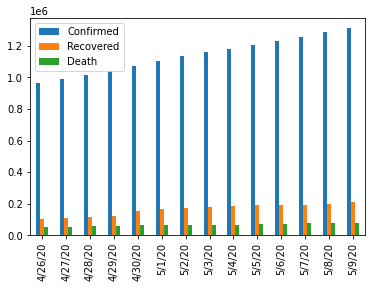

In [51]:
us_data[-14:].plot(kind='bar')

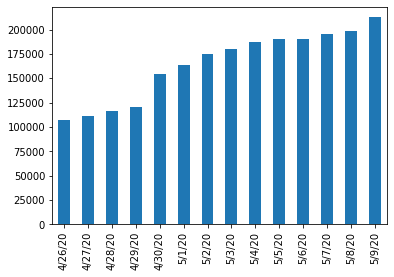

In [52]:
us_data.Recovered[-14:].plot(kind='bar')

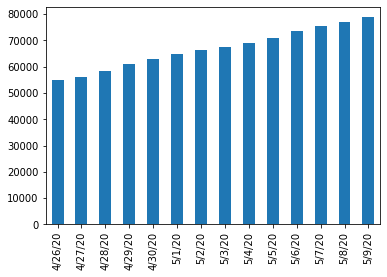

In [53]:
us_data.Death[-14:].plot(kind='bar')